In [1]:
import json
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmasher as cmr
import seaborn as sns
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)
from matplotlib.patches import Arc
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
from matplotlib.colors import (to_rgba, LinearSegmentedColormap)
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter



from PIL import Image
from mplsoccer import Pitch, VerticalPitch, add_image

from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

from highlight_text import fig_text
from bs4 import BeautifulSoup

from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from matplotlib.patches import Arc

In [2]:
with open('sevilla.json',encoding = "utf8") as f:
    data = json.load(f)

In [3]:
data['home'].keys()

dict_keys(['teamId', 'formations', 'stats', 'incidentEvents', 'shotZones', 'name', 'countryName', 'players', 'managerName', 'scores', 'field', 'averageAge'])

In [4]:
data['home']['formations']

[{'formationId': 4,
  'formationName': '433',
  'captainPlayerId': 77464,
  'period': 16,
  'startMinuteExpanded': 0,
  'endMinuteExpanded': 48,
  'jerseyNumbers': [18,
   82,
   21,
   8,
   3,
   14,
   80,
   47,
   19,
   26,
   10,
   5,
   6,
   7,
   16,
   17,
   20,
   31,
   33,
   97],
  'formationSlots': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'playerIds': [133569,
   444791,
   355110,
   77464,
   313171,
   122117,
   395692,
   331254,
   365409,
   104749,
   113069,
   101374,
   122945,
   128967,
   303139,
   73084,
   136741,
   121774,
   8155,
   425406],
  'formationPositions': [{'vertical': 0.0, 'horizontal': 5.0},
   {'vertical': 2.5, 'horizontal': 1.0},
   {'vertical': 2.5, 'horizontal': 9.0},
   {'vertical': 5.5, 'horizontal': 5.0},
   {'vertical': 2.5, 'horizontal': 3.5},
   {'vertical': 2.5, 'horizontal': 6.5},
   {'vertical': 5.5, 'horizontal': 2.0},
   {'vertical': 5.5, '

In [5]:
df = pd.json_normalize(data['events'], sep='_')
df = df[['id', 'playerId', 'teamId', 'eventId', 'minute', 'second', 'type_displayName', 
         'outcomeType_displayName', 'x', 'y', 'endX', 'endY', 'isTouch']]
df.head()

,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch
0,2.480642e+09,NaN,67,2,0,0.0,Start,Successful,0.0,0.0,NaN,NaN,False
1,2.480642e+09,NaN,167,2,0,0.0,Start,Successful,0.0,0.0,NaN,NaN,False
2,2.480642e+09,82989.0,67,3,0,0.0,Pass,Successful,49.7,49.7,39.1,46.1,True
3,2.480642e+09,22732.0,67,4,0,2.0,Pass,Successful,39.9,47.8,35.1,91.4,True
4,2.480642e+09,106530.0,67,5,0,5.0,Pass,Successful,32.3,84.8,8.3,58.4,True


In [6]:
team_dict  = {
    data['home']['teamId']: data['home']['name'],
    data['away']['teamId']: data['away']['name']
}

player = data['home']['players'] + data['away']['players']
player_dict = {}

for i in player:
    player_dict[i['playerId']] = i['name']
    
df_player = df[df.isTouch == True]
foul_ids = df_player[df_player.playerId.isnull()].index.tolist()
df_player = df_player.drop(foul_ids)
df_player['team_name'] = df_player.teamId.apply(lambda x: team_dict[x])
df_player['player_name'] = df_player.playerId.apply(lambda x: player_dict[x])
df_player.head()

,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch,team_name,player_name
2,2.480642e+09,82989.0,67,3,0,0.0,Pass,Successful,49.7,49.7,39.1,46.1,True,Sevilla,Isco
3,2.480642e+09,22732.0,67,4,0,2.0,Pass,Successful,39.9,47.8,35.1,91.4,True,Sevilla,Ivan Rakitic
4,2.480642e+09,106530.0,67,5,0,5.0,Pass,Successful,32.3,84.8,8.3,58.4,True,Sevilla,Karim Rekik
5,2.480642e+09,136220.0,67,6,0,11.0,Pass,Successful,10.1,46.6,33.6,7.7,True,Sevilla,Yassine Bounou
6,2.480642e+09,316883.0,67,7,0,15.0,Pass,Successful,39.4,9.2,50.7,23.5,True,Sevilla,Gonzalo Montiel


In [7]:
df_player[df_player.player_name == 'Julián Álvarez'].head()

,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch,team_name,player_name
31,2.480642e+09,365409.0,167,17,1,34.0,Pass,Successful,89.1,57.2,85.9,47.9,True,Man City,Julián Álvarez
131,2.480647e+09,365409.0,167,88,6,15.0,Pass,Successful,66.5,88.1,67.5,98.6,True,Man City,Julián Álvarez
191,2.480649e+09,365409.0,167,127,9,7.0,Pass,Successful,67.5,69.0,72.0,93.5,True,Man City,Julián Álvarez
195,2.480650e+09,365409.0,167,132,9,57.0,Pass,Successful,54.7,35.8,46.8,39.5,True,Man City,Julián Álvarez
209,2.480651e+09,365409.0,167,145,10,48.0,Pass,Unsuccessful,70.1,51.5,69.5,61.0,True,Man City,Julián Álvarez


In [8]:
touches_df = df[df.isTouch == True]
foul_ids = touches_df[touches_df.playerId.isnull()].index.tolist()
touches_df = touches_df.drop(foul_ids)
touches_df['team_name'] = touches_df.teamId.apply(lambda x: team_dict[x])
touches_df['player_name'] = touches_df.playerId.apply(lambda x: player_dict[x])
touches_df.head()

,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch,team_name,player_name
2,2.480642e+09,82989.0,67,3,0,0.0,Pass,Successful,49.7,49.7,39.1,46.1,True,Sevilla,Isco
3,2.480642e+09,22732.0,67,4,0,2.0,Pass,Successful,39.9,47.8,35.1,91.4,True,Sevilla,Ivan Rakitic
4,2.480642e+09,106530.0,67,5,0,5.0,Pass,Successful,32.3,84.8,8.3,58.4,True,Sevilla,Karim Rekik
5,2.480642e+09,136220.0,67,6,0,11.0,Pass,Successful,10.1,46.6,33.6,7.7,True,Sevilla,Yassine Bounou
6,2.480642e+09,316883.0,67,7,0,15.0,Pass,Successful,39.4,9.2,50.7,23.5,True,Sevilla,Gonzalo Montiel


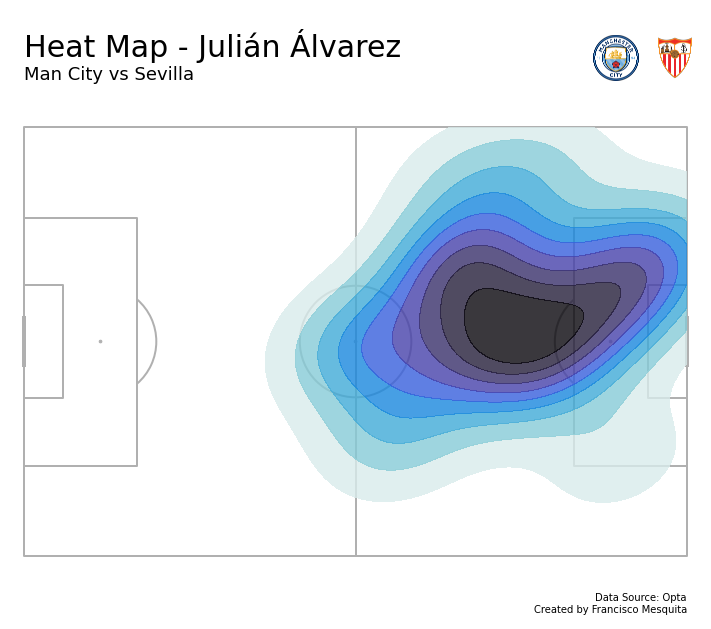

In [9]:
pitch = Pitch(pitch_type='opta')
fig, ax = pitch.grid(axis=False)
fig.set_facecolor("white")

grealish = touches_df[touches_df.player_name == 'Julián Álvarez']

pitch.kdeplot(grealish.x, grealish.y, cmap=cmr.freeze_r, shade=True, alpha=0.8, ax=ax['pitch'])

ax['title'].text(0, 0.6, 'Heat Map - Julián Álvarez', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

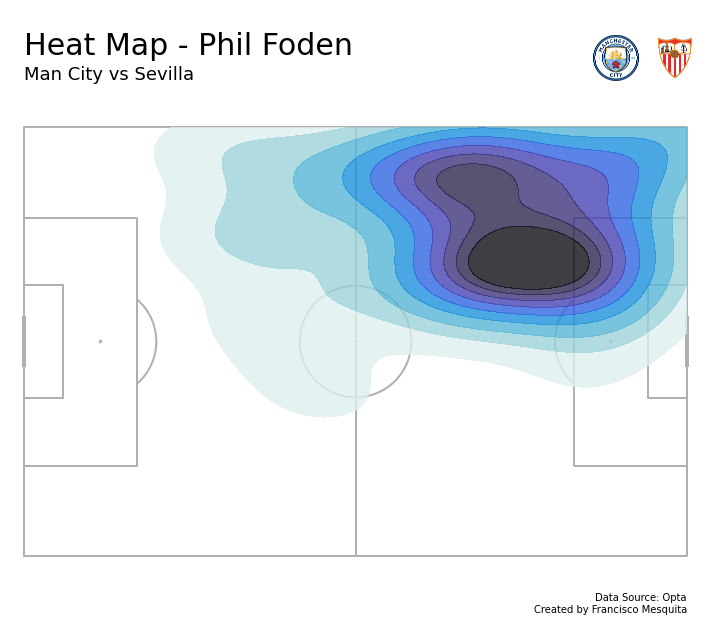

In [10]:
pitch = Pitch(pitch_type='opta')
fig, ax = pitch.grid(axis=False)
fig.set_facecolor("white")

foden = touches_df[touches_df.player_name == 'Phil Foden']

pitch.kdeplot(foden.x, foden.y, cmap=cmr.freeze_r, shade=True, alpha=0.8, ax=ax['pitch'])

ax['title'].text(0, 0.6, 'Heat Map - Phil Foden', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

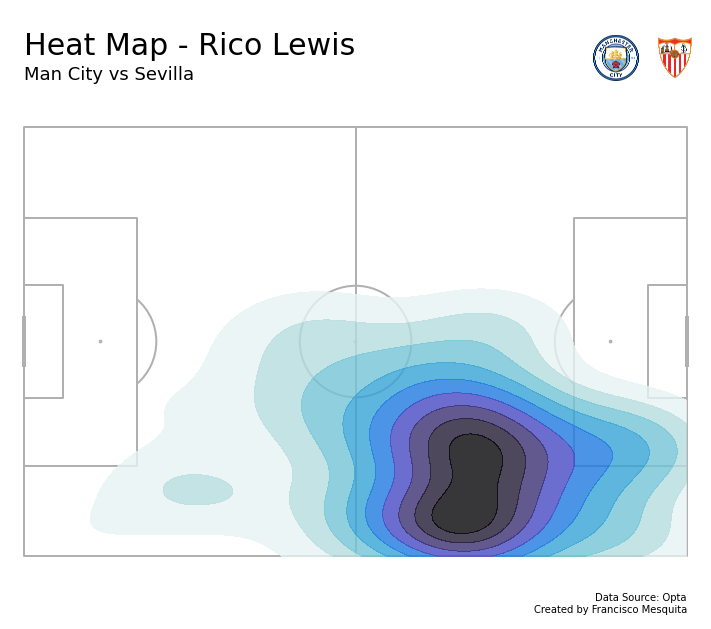

In [11]:
pitch = Pitch(pitch_type='opta')
fig, ax = pitch.grid(axis=False)
fig.set_facecolor("white")

rico = touches_df[touches_df.player_name == 'Rico Lewis']

pitch.kdeplot(rico.x, rico.y, cmap=cmr.freeze_r, shade=True, alpha=0.8, ax=ax['pitch'])

ax['title'].text(0, 0.6, 'Heat Map - Rico Lewis', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

In [12]:
pass_data = df[df.type_displayName == 'Pass'].reset_index()
pass_data['team_name'] = pass_data.teamId.apply(lambda x: team_dict[x])
pass_data['player_name'] = pass_data.playerId.apply(lambda x: player_dict[x])
pass_data.head()

,index,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch,team_name,player_name
0,2,2.480642e+09,82989.0,67,3,0,0.0,Pass,Successful,49.7,49.7,39.1,46.1,True,Sevilla,Isco
1,3,2.480642e+09,22732.0,67,4,0,2.0,Pass,Successful,39.9,47.8,35.1,91.4,True,Sevilla,Ivan Rakitic
2,4,2.480642e+09,106530.0,67,5,0,5.0,Pass,Successful,32.3,84.8,8.3,58.4,True,Sevilla,Karim Rekik
3,5,2.480642e+09,136220.0,67,6,0,11.0,Pass,Successful,10.1,46.6,33.6,7.7,True,Sevilla,Yassine Bounou
4,6,2.480642e+09,316883.0,67,7,0,15.0,Pass,Successful,39.4,9.2,50.7,23.5,True,Sevilla,Gonzalo Montiel


In [13]:
def is_atk_third(data):
    if data.endX > 66.6 and data.x <= 66.6:
        return True
    else:
        return False

def at_atk_third(data):
    if data.x > 66.6 and data.endX > 66.6:
        return True
    else:
        return False

pass_data['to_atk_third'] = pass_data.apply(lambda x: is_atk_third(x), axis=1)
pass_data['at_atk_third'] = pass_data.apply(lambda x: at_atk_third(x), axis=1)

pass_data.head()

,index,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch,team_name,player_name,to_atk_third,at_atk_third
0,2,2.480642e+09,82989.0,67,3,0,0.0,Pass,Successful,49.7,49.7,39.1,46.1,True,Sevilla,Isco,False,False
1,3,2.480642e+09,22732.0,67,4,0,2.0,Pass,Successful,39.9,47.8,35.1,91.4,True,Sevilla,Ivan Rakitic,False,False
2,4,2.480642e+09,106530.0,67,5,0,5.0,Pass,Successful,32.3,84.8,8.3,58.4,True,Sevilla,Karim Rekik,False,False
3,5,2.480642e+09,136220.0,67,6,0,11.0,Pass,Successful,10.1,46.6,33.6,7.7,True,Sevilla,Yassine Bounou,False,False
4,6,2.480642e+09,316883.0,67,7,0,15.0,Pass,Successful,39.4,9.2,50.7,23.5,True,Sevilla,Gonzalo Montiel,False,False


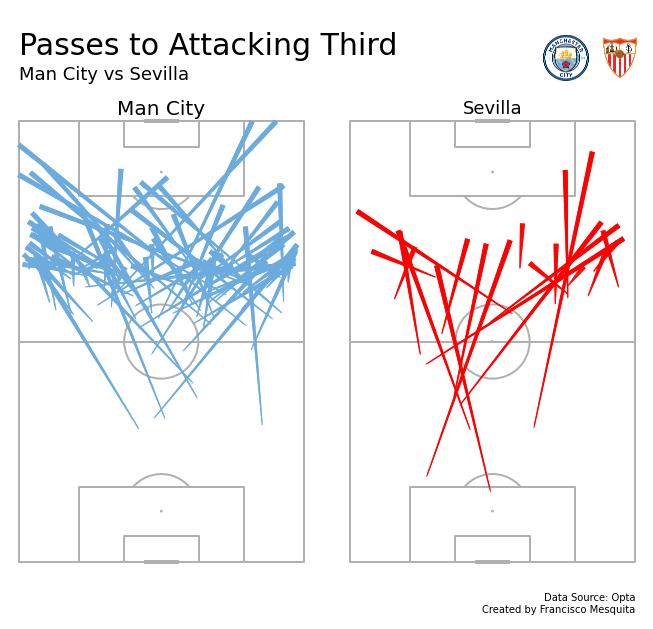

In [14]:
pitch = VerticalPitch(pitch_type='opta', half=False)
fig, ax = pitch.grid(ncols=2, axis=False)
fig.set_facecolor("white")


pass_atk = pass_data[pass_data.to_atk_third == True]

home = pass_atk[pass_atk.team_name == data['home']['name']]
pitch.lines(home.x, home.y, home.endX, home.endY, comet=True, ax=ax['pitch'][0], color='#6CABDD')
ax['pitch'][0].text(50, 103, data['home']['name'], fontsize=20, va='center', ha='center')

away = pass_atk[pass_atk.team_name == data['away']['name']]
pitch.lines(away.x, away.y, away.endX, away.endY, comet=True, ax=ax['pitch'][1], color= 'red')
ax['pitch'][1].text(50, 103, data['away']['name'], fontsize=18, va='center', ha='center')

ax['title'].text(0, 0.6, 'Passes to Attacking Third', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

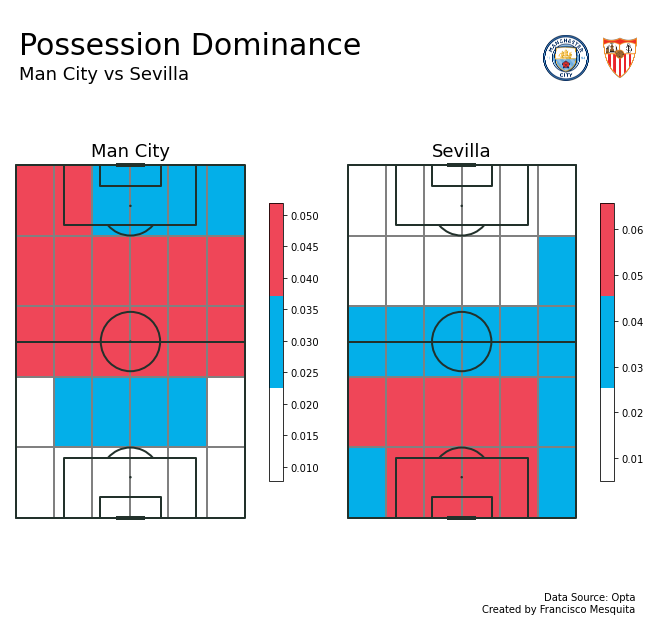

In [15]:
cmap = ListedColormap(['white', '#03afe9', '#ef4658'])

pitch = VerticalPitch(pitch_type='opta',line_color='#22312b')
fig, ax = pitch.grid(ncols=2, axis=False)
fig.set_facecolor("white")

# Home Team
home = pass_data[pass_data.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins=(5, 6), normalize=True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax=ax['pitch'][0], cmap=cmap, edgecolors='gray', zorder=0)
cbar = fig.colorbar(hm, ax=ax['pitch'][0], shrink=0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va='center', ha='center', fontsize=18)

# Away Team
home = pass_data[pass_data.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins=(5, 6), normalize=True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax=ax['pitch'][1], cmap=cmap, edgecolors='gray', zorder=0)
cbar = fig.colorbar(hm, ax=ax['pitch'][1], shrink=0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va='center', ha='center', fontsize=18)

ax['title'].text(0, 0.6, 'Possession Dominance', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

# Home
add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
# Away
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

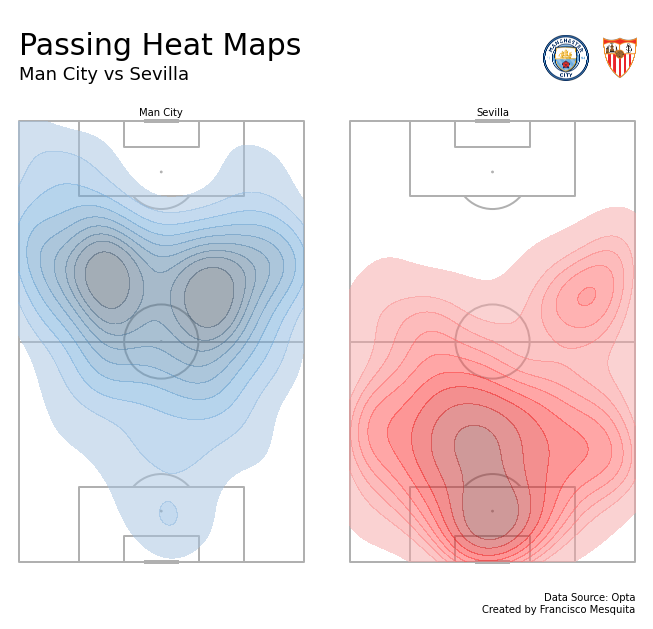

In [16]:
pitch = VerticalPitch(pitch_type='opta')
fig, ax = pitch.grid(ncols=2, axis=False)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade=True, alpha=0.5, ax=ax['pitch'][0], color='#6CABDD')
ax['pitch'][0].text(50, 102, data['home']['name'], va='center', ha='center')


away = pass_data[pass_data.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade=True, alpha=0.5, ax=ax['pitch'][1], color= 'red')
ax['pitch'][1].text(50, 102, data['away']['name'], va='center', ha='center')

ax['title'].text(0, 0.6, 'Passing Heat Maps', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

(-0.5, 3499.5, 3499.5, -0.5)

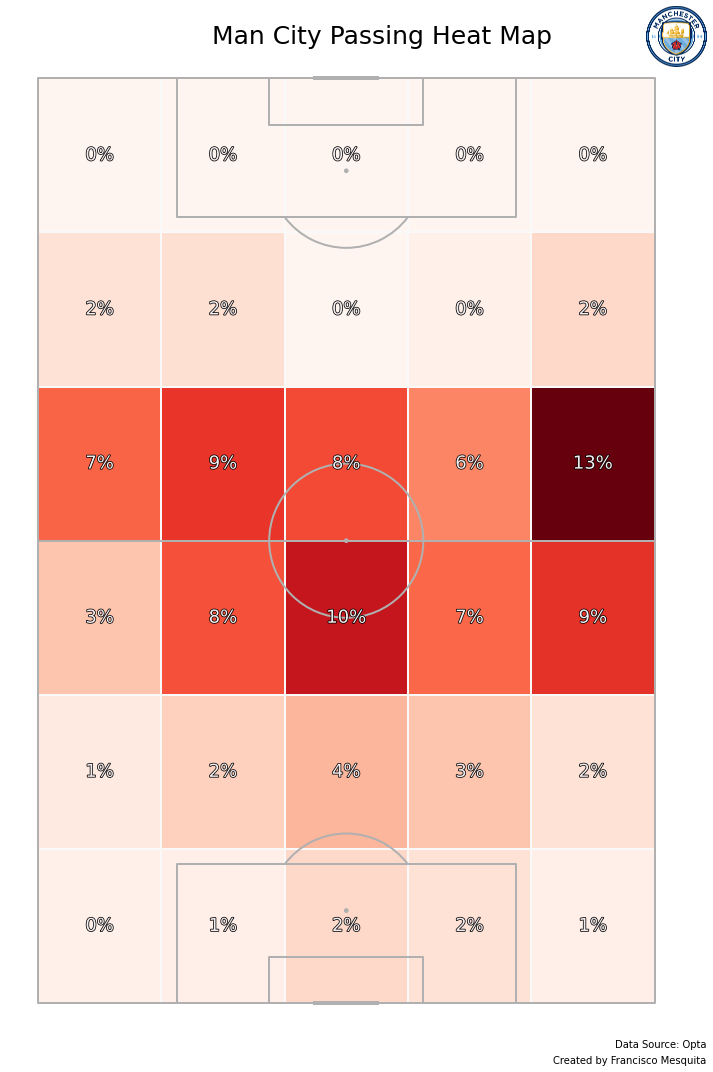

In [17]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white')
fig, ax = pitch.draw(figsize=(10, 14))
fig.set_facecolor("white")
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins=(6, 5), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

title1 = fig.text(x=0.55, y=1, s='Man City Passing Heat Map', va='center', ha='center',
                  size=25, color='black')

legend1 = fig.text(1, 0, 'Data Source: Opta', va='center', ha='right')
legend2 = fig.text(1, -0.015, 'Created by Francisco Mesquita', va='center', ha='right')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.9,0.97,0.1,0.06], anchor='NE', zorder=1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

In [18]:
avg_pos = pass_data[['team_name', 'player_name', 'minute', 'x', 'y', 'endX', 'endY']].groupby(['team_name', 'player_name']).agg({'minute': [np.max, np.min], 'x':np.mean, 'y': np.mean}).reset_index().reset_index()
avg_pos.columns = [' '.join(col).strip() for col in avg_pos.columns.values]
avg_pos['mins_played'] = avg_pos['minute amax'] - avg_pos['minute amin']
avg_pos.head()

,index,team_name,player_name,minute amax,minute amin,x mean,y mean,mins_played
0,0,Man City,Aymeric Laporte,86,2,50.547436,69.739744,84
1,1,Man City,Bernardo Silva,92,57,58.392453,53.864151,35
2,2,Man City,Cole Palmer,64,4,67.535294,25.811765,60
3,3,Man City,Ilkay Gündogan,54,0,56.484375,55.420313,54
4,4,Man City,Jack Grealish,47,1,73.387097,81.309677,46


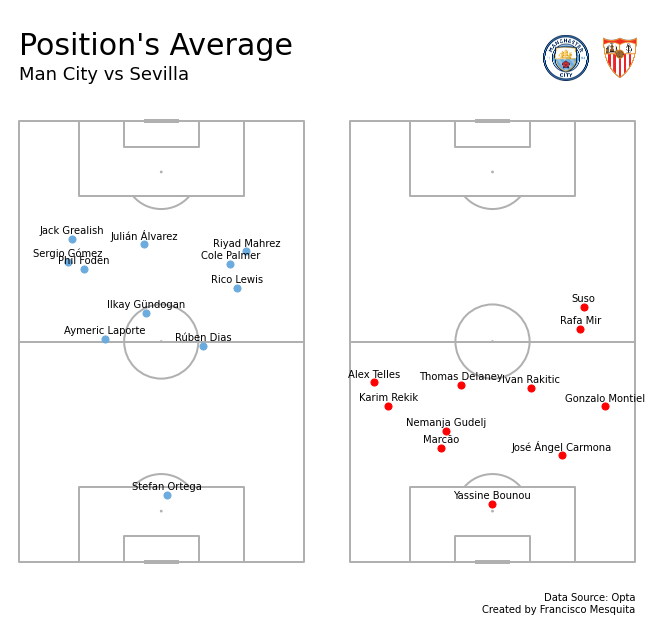

In [19]:
pitch = VerticalPitch(pitch_type='opta')
fig, ax = pitch.grid(ncols=2, axis=False)
fig.set_facecolor("white")

home = avg_pos[avg_pos.team_name == data['home']['name']]
home = home.sort_values('mins_played', ascending=False).iloc[:11, :]
pitch.scatter(home['x mean'], home['y mean'], s=50, ax=ax['pitch'][0], color='#6CABDD')

for i, d in home.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), va='center', ha='center', ax=ax['pitch'][0])

away = avg_pos[avg_pos.team_name == data['away']['name']]
away = away.sort_values('mins_played', ascending=False).iloc[:11, :]
pitch.scatter(away['x mean'], away['y mean'], s=50, ax=ax['pitch'][1], color= 'red')

for i, d in away.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), va='center', ha='center', ax=ax['pitch'][1])

ax['title'].text(0, 0.6, 'Position\'s Average', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

In [20]:
team = pass_data.team_name.values.tolist()
passer = pass_data.player_name.values.tolist()
receiver = pass_data.player_name.shift(-1).tolist()
team_receiver = pass_data.team_name.shift(-1).tolist()
pass_outcome = pass_data.outcomeType_displayName.values.tolist()
x = pass_data.x.values.tolist()
y = pass_data.y.values.tolist()

pass_net_df = pd.DataFrame({
    'team': team,
    'team_receiver': team_receiver,
    'passer': passer,
    'receiver': receiver,
    'pass_outcome': pass_outcome,
    'x': x,
    'y': y
})

pass_net_df = pass_net_df[pass_net_df.pass_outcome == 'Successful']
pass_net_df = pass_net_df[pass_net_df.team == pass_net_df.team_receiver]
pass_net_df['id'] = pass_net_df['passer'] + pass_net_df['receiver']

pass_net_df.head()

,team,team_receiver,passer,receiver,pass_outcome,x,y,id
0,Sevilla,Sevilla,Isco,Ivan Rakitic,Successful,49.7,49.7,IscoIvan Rakitic
1,Sevilla,Sevilla,Ivan Rakitic,Karim Rekik,Successful,39.9,47.8,Ivan RakiticKarim Rekik
2,Sevilla,Sevilla,Karim Rekik,Yassine Bounou,Successful,32.3,84.8,Karim RekikYassine Bounou
3,Sevilla,Sevilla,Yassine Bounou,Gonzalo Montiel,Successful,10.1,46.6,Yassine BounouGonzalo Montiel
6,Sevilla,Sevilla,Rafa Mir,Papu Gómez,Successful,63.3,13.4,Rafa MirPapu Gómez


In [21]:
pass_pair_df = pass_net_df[['passer', 'receiver', 'pass_outcome']].groupby(['passer', 'receiver']).count().reset_index()
pass_pair_df['id'] = pass_pair_df['passer'] + pass_pair_df['receiver']
pass_pair_df = pass_pair_df.sort_values('pass_outcome', ascending=False)
# pass_pair_df = pass_pair_df.drop(['passer', 'receiver'], axis=1)
pass_pair_df.head()

,passer,receiver,pass_outcome,id
12,Aymeric Laporte,Rúben Dias,32,Aymeric LaporteRúben Dias
101,José Ángel Carmona,Yassine Bounou,22,José Ángel CarmonaYassine Bounou
172,Rico Lewis,Rúben Dias,20,Rico LewisRúben Dias
198,Rúben Dias,Aymeric Laporte,19,Rúben DiasAymeric Laporte
247,Yassine Bounou,José Ángel Carmona,17,Yassine BounouJosé Ángel Carmona


In [22]:
# Retrieve Top 11 Players
top_11_home = avg_pos[avg_pos.team_name == data['home']['name']].sort_values('mins_played', 
                ascending=False).player_name.tolist()[:11]
top_11_away = avg_pos[avg_pos.team_name == data['away']['name']].sort_values('mins_played', 
                ascending=False).player_name.tolist()[:11]

In [23]:
# Filter the data
avg_pos_11 = avg_pos[avg_pos.player_name.isin(top_11_home + top_11_away)].reset_index(drop=True)
avg_pos_11 = avg_pos_11.drop(['index', 'minute amax', 'minute amin', 'mins_played'], axis=1)
avg_pos_11

,team_name,player_name,x mean,y mean
0,Man City,Aymeric Laporte,50.547436,69.739744
1,Man City,Cole Palmer,67.535294,25.811765
2,Man City,Ilkay Gündogan,56.484375,55.420313
3,Man City,Jack Grealish,73.387097,81.309677
4,Man City,Julián Álvarez,72.200000,56.017647
5,Man City,Phil Foden,66.548936,77.182979
6,Man City,Rico Lewis,62.129310,23.389655
7,Man City,Riyad Mahrez,70.443478,20.202174
8,Man City,Rúben Dias,49.011607,35.212500
9,Man City,Sergio Gómez,68.153571,82.755357


In [24]:
pass_merge = pass_pair_df.merge(avg_pos_11, left_on='passer', right_on='player_name',)
pass_merge = pass_merge.rename({'x mean': 'x', 'y mean': 'y'}, axis='columns')
pass_merge = pass_merge.merge(avg_pos_11, left_on='receiver', right_on='player_name',)
pass_merge = pass_merge.rename({'x mean': 'x_end', 'y mean': 'y_end'}, axis='columns')
pass_merge = pass_merge.drop(['player_name_x', 'team_name_y', 'id', 'player_name_y'], axis=1)
pass_merge = pass_merge.rename({'team_name_x': 'team_name'}, axis='columns')

pass_merge.head()

,passer,receiver,pass_outcome,team_name,x,y,x_end,y_end
0,Aymeric Laporte,Rúben Dias,32,Man City,50.547436,69.739744,49.011607,35.2125
1,Rico Lewis,Rúben Dias,20,Man City,62.129310,23.389655,49.011607,35.2125
2,Riyad Mahrez,Rúben Dias,4,Man City,70.443478,20.202174,49.011607,35.2125
3,Sergio Gómez,Rúben Dias,4,Man City,68.153571,82.755357,49.011607,35.2125
4,Stefan Ortega,Rúben Dias,11,Man City,15.106897,48.058621,49.011607,35.2125


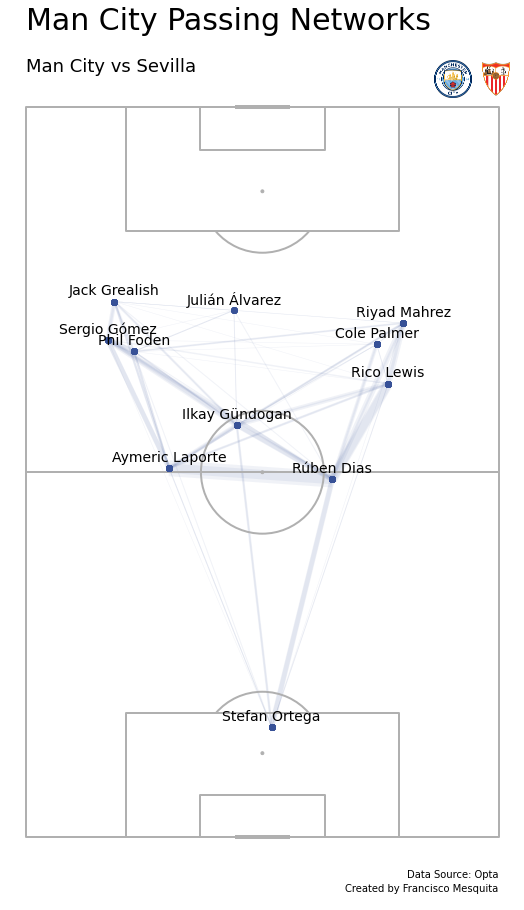

In [25]:
pitch = VerticalPitch(pitch_type='opta')
#fig, ax = pitch.grid(ncols=1, axis=False)

fig, ax = pitch.grid(figheight=13, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("white")

home = pass_merge[pass_merge.team_name == data['home']['name']]

pitch.lines(home.x, home.y, home.x_end, home.y_end, color='#375197', 
            linewidth=home.pass_outcome * 0.5, alpha = 0.07, 
            zorder=0, ax=ax['pitch'])#[0])
pitch.scatter(home.x, home.y, color='#375197', ax=ax['pitch'])#[0])

for i, d in home[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x+1.5, d.y), ax=ax['pitch'], va='center', ha='center', size = 14)

ax['title'].text(0, 0.9, 'Man City Passing Networks', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

#add_image(Image.open('mancity.png'), fig, 
#          left=0.5, bottom=0.9, width=0.1, height=0.05)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.09)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')


plt.show()

In [26]:
pass_data['begin'] = pass_data.apply(lambda x: np.sqrt((100-x['x']) ** 2 + (50 - x['y'])), axis=1)
pass_data['end'] = pass_data.apply(lambda x: np.sqrt((100-x['endX']) ** 2 + (50 - x['endY'])), axis=1)
pass_data['progressive'] = pass_data.apply(lambda x: True if x.end / x.begin < .75 else False, axis=1)

pass_prog = pass_data[pass_data.progressive == True]
home = pass_prog[pass_prog.team_name == data['home']['name']]

home_succ = home[home.outcomeType_displayName == 'Successful']

away = pass_prog[pass_prog.team_name == data['away']['name']]

away_succ = away[away.outcomeType_displayName == 'Successful']

away_succ

,index,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,...,endX,endY,isTouch,team_name,player_name,to_atk_third,at_atk_third,begin,end,progressive
3,5,2.480642e+09,136220.0,67,6,0,11.0,Pass,Successful,10.1,...,33.6,7.7,True,Sevilla,Yassine Bounou,False,False,89.918908,66.717764,True
7,12,2.480642e+09,22546.0,67,11,0,20.0,Pass,Successful,59.8,...,88.9,24.5,True,Sevilla,Papu Gómez,True,False,40.527028,12.194671,True
23,35,2.480643e+09,136220.0,67,26,1,57.0,Pass,Successful,4.5,...,32.1,15.2,True,Sevilla,Yassine Bounou,False,False,95.480626,68.155777,True
87,111,2.480646e+09,22546.0,67,46,5,13.0,Pass,Successful,46.9,...,63.2,11.2,True,Sevilla,Papu Gómez,False,False,53.100000,37.323451,True
207,257,2.480653e+09,22732.0,67,125,12,58.0,Pass,Successful,35.5,...,77.1,11.8,True,Sevilla,Ivan Rakitic,True,False,64.410791,23.719401,True
212,262,2.480653e+09,318120.0,67,130,13,20.0,Pass,Successful,44.8,...,73.4,4.0,True,Sevilla,Marcão,True,False,54.987635,27.451047,True
217,267,2.480653e+09,22732.0,67,135,13,35.0,Pass,Successful,56.3,...,79.6,97.5,True,Sevilla,Ivan Rakitic,True,False,43.780018,19.200521,True
232,287,2.480656e+09,136220.0,67,140,16,43.0,Pass,Successful,7.3,...,33.0,96.0,True,Sevilla,Yassine Bounou,False,False,92.676804,66.655832,True
256,326,2.480657e+09,73744.0,67,159,18,56.0,Pass,Successful,32.8,...,62.5,8.3,True,Sevilla,Thomas Delaney,False,False,67.175442,38.051938,True
259,333,2.480658e+09,422956.0,67,161,19,10.0,Pass,Successful,58.5,...,72.2,27.7,True,Sevilla,José Ángel Carmona,True,False,41.764219,28.198227,True


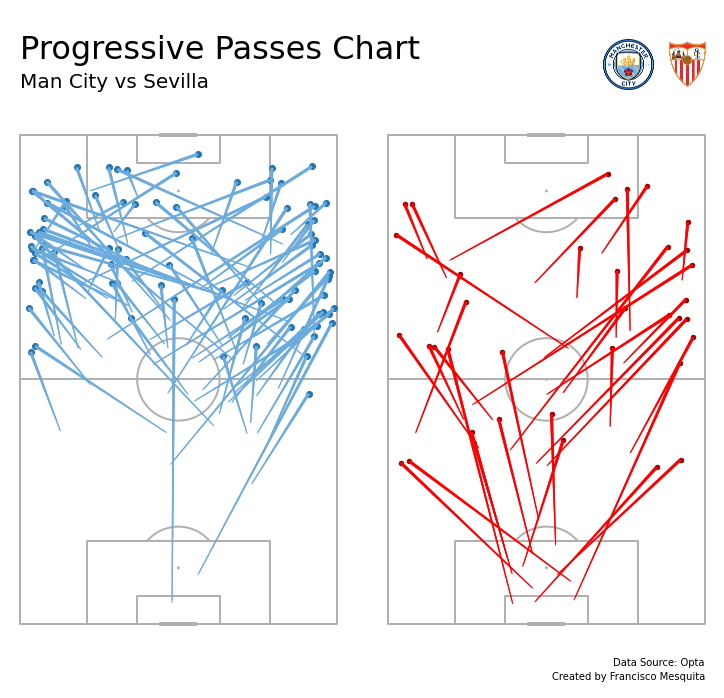

In [36]:
pitch = VerticalPitch(pitch_type='opta', line_zorder=0)
fig, ax = pitch.grid(ncols=2, axis=False, figheight=10)

fig.set_facecolor("white")

home = pass_prog[pass_prog.team_name == data['home']['name']]

home_succ = home[home.outcomeType_displayName == 'Successful']

pitch.lines(home_succ.x, home_succ.y, home_succ.endX, home_succ.endY, comet=True, linewidth=3, ax=ax['pitch'][0], color='#6CABDD')
pitch.scatter(home_succ.endX, home_succ.endY, ax=ax['pitch'][0])

away = pass_prog[pass_prog.team_name == data['away']['name']]

away_succ = away[away.outcomeType_displayName == 'Successful']

pitch.lines(away_succ.x, away_succ.y, away_succ.endX, away_succ.endY, comet=True, linewidth=3, ax=ax['pitch'][1], color= 'red')
pitch.scatter(away_succ.endX, away_succ.endY, s=20, ax=ax['pitch'][1], color = '#8b0000')

ax['title'].text(0, 0.6, 'Progressive Passes Chart', va='center', ha='left', fontsize=32)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=20)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

In [38]:
away_succ

,index,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,...,endX,endY,isTouch,team_name,player_name,to_atk_third,at_atk_third,begin,end,progressive
3,5,2.480642e+09,136220.0,67,6,0,11.0,Pass,Successful,10.1,...,33.6,7.7,True,Sevilla,Yassine Bounou,False,False,89.918908,66.717764,True
7,12,2.480642e+09,22546.0,67,11,0,20.0,Pass,Successful,59.8,...,88.9,24.5,True,Sevilla,Papu Gómez,True,False,40.527028,12.194671,True
23,35,2.480643e+09,136220.0,67,26,1,57.0,Pass,Successful,4.5,...,32.1,15.2,True,Sevilla,Yassine Bounou,False,False,95.480626,68.155777,True
87,111,2.480646e+09,22546.0,67,46,5,13.0,Pass,Successful,46.9,...,63.2,11.2,True,Sevilla,Papu Gómez,False,False,53.100000,37.323451,True
207,257,2.480653e+09,22732.0,67,125,12,58.0,Pass,Successful,35.5,...,77.1,11.8,True,Sevilla,Ivan Rakitic,True,False,64.410791,23.719401,True
212,262,2.480653e+09,318120.0,67,130,13,20.0,Pass,Successful,44.8,...,73.4,4.0,True,Sevilla,Marcão,True,False,54.987635,27.451047,True
217,267,2.480653e+09,22732.0,67,135,13,35.0,Pass,Successful,56.3,...,79.6,97.5,True,Sevilla,Ivan Rakitic,True,False,43.780018,19.200521,True
232,287,2.480656e+09,136220.0,67,140,16,43.0,Pass,Successful,7.3,...,33.0,96.0,True,Sevilla,Yassine Bounou,False,False,92.676804,66.655832,True
256,326,2.480657e+09,73744.0,67,159,18,56.0,Pass,Successful,32.8,...,62.5,8.3,True,Sevilla,Thomas Delaney,False,False,67.175442,38.051938,True
259,333,2.480658e+09,422956.0,67,161,19,10.0,Pass,Successful,58.5,...,72.2,27.7,True,Sevilla,José Ángel Carmona,True,False,41.764219,28.198227,True


In [28]:
df_def = df[df.type_displayName.isin(['Clearance', 'Interception', 'BlockedPass', 'Tackle'])]
df_def['team_name'] = df_def.teamId.apply(lambda x: team_dict[x])
df_def['player_name'] = df_def.playerId.apply(lambda x: player_dict[x])
df_def.head()

,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch,team_name,player_name
24,2.480642e+09,444791.0,167,13,1,16.0,Tackle,Successful,64.6,3.9,NaN,NaN,True,Man City,Rico Lewis
42,2.480643e+09,395692.0,167,20,2,11.0,BlockedPass,Successful,64.7,2.8,NaN,NaN,True,Man City,Cole Palmer
89,2.480645e+09,303729.0,67,35,4,21.0,Tackle,Unsuccessful,17.4,89.0,NaN,NaN,True,Sevilla,Marcos Acuña
99,2.480645e+09,318120.0,67,42,4,33.0,BlockedPass,Successful,15.5,64.1,NaN,NaN,True,Sevilla,Marcão
109,2.480646e+09,22732.0,67,44,5,9.0,BlockedPass,Successful,43.5,62.7,NaN,NaN,True,Sevilla,Ivan Rakitic


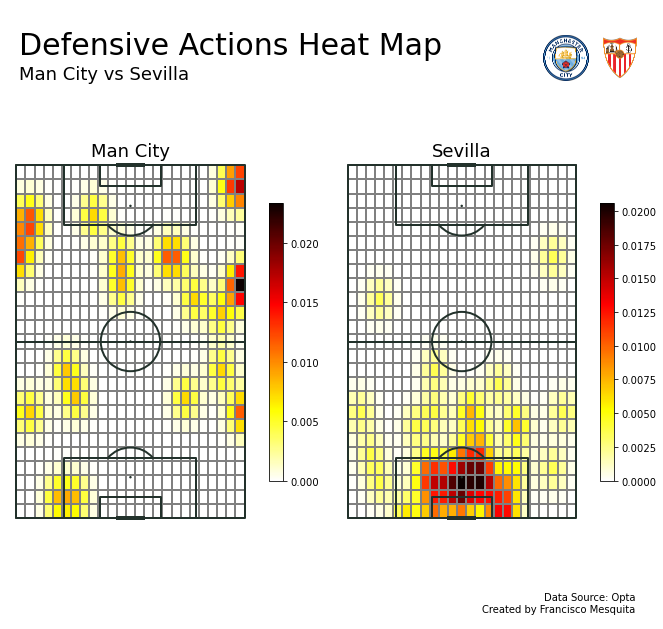

In [29]:
pitch = VerticalPitch(pitch_type='opta', line_color='#22312b')
fig, ax = pitch.grid(ncols=2, axis=False,)
fig.set_facecolor("white")

# Home Team
home = df_def[df_def.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins=(25, 25), normalize=True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax=ax['pitch'][0], cmap='hot_r', edgecolors='gray', zorder=0)
cbar = fig.colorbar(hm, ax=ax['pitch'][0], shrink=0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va='center', ha='center', fontsize=18)

# Away Team
home = df_def[df_def.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins=(25, 25), normalize=True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax=ax['pitch'][1], cmap='hot_r', edgecolors='gray', zorder=0)
cbar = fig.colorbar(hm, ax=ax['pitch'][1], shrink=0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va='center', ha='center', fontsize=18)

ax['title'].text(0, 0.6, 'Defensive Actions Heat Map', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

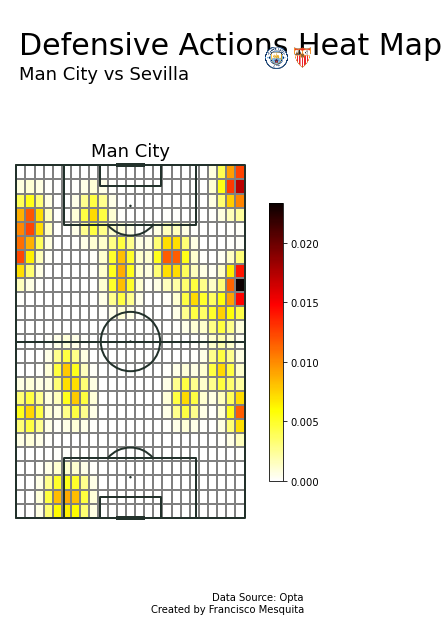

In [40]:
pitch = VerticalPitch(pitch_type='opta', line_color='#22312b')
fig, ax = pitch.grid(ncols=1, axis=False,)
fig.set_facecolor("white")

# Home Team
home = df_def[df_def.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins=(25, 25), normalize=True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax=ax['pitch'], cmap='hot_r', edgecolors='gray', zorder=0)
cbar = fig.colorbar(hm, ax=ax['pitch'], shrink=0.6)
ax['pitch'].text(50, 104, data['home']['name'], va='center', ha='center', fontsize=18)

# Away Team
#home = df_def[df_def.team_name == data['away']['name']]
#bin_statistic = pitch.bin_statistic(home.x, home.y, statistic='count', bins=(25, 25), normalize=True)
#bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

#hm = pitch.heatmap(bin_statistic, ax=ax['pitch'][1], cmap='hot_r', edgecolors='gray', zorder=0)
#cbar = fig.colorbar(hm, ax=ax['pitch'][1], shrink=0.6)
#ax['pitch'][1].text(50, 104, data['away']['name'], va='center', ha='center', fontsize=18)

ax['title'].text(0, 0.6, 'Defensive Actions Heat Map', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.show()

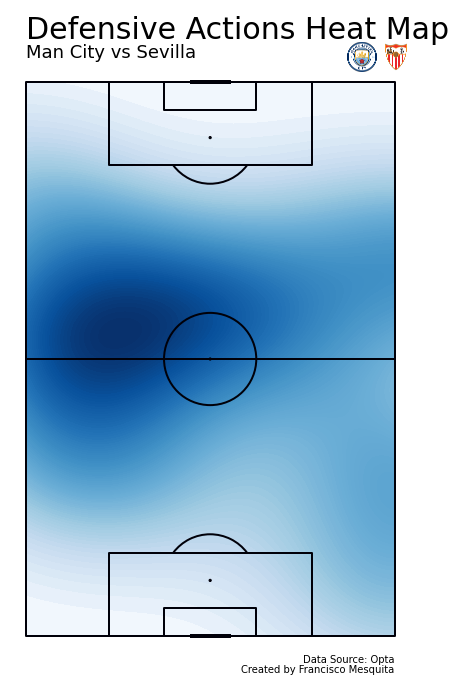

In [35]:
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.82, endnote_height=0.03)
fig.set_facecolor('white')

pitch = VerticalPitch(line_color='#000009', line_zorder=1)

# Home Team
home = df_def[df_def.team_name == data['home']['name']]

kde_HD = pitch.kdeplot(home.x, home.y, ax=axs['pitch'],
                          shade=True, levels=100, shade_lowest=True,
                          cut=4, cmap='Blues')

#axs['title'].text(0.5, 0.1, "Defensive Actions by Man City", color='#000009',
#                  va='center', ha='center', #fontproperties=robotto_regular.prop, 
#                  fontsize=25)

axs['title'].text(0, 0.6, 'Defensive Actions Heat Map', va='center', ha='left', fontsize=30)
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

axs['endnote'].text(1, 0.8, 'Data Source: Opta', va='center', ha='right')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')

plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True


add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.07)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.07)
#imHD = plt.imread('mancity.png') # insert local path of the image.
#newaxHD = fig.add_axes([1.02,0.86,0.1,0.06], anchor='NE', zorder=1)
#newaxHD.imshow(imHD)
#newaxHD.axis('off')

In [31]:
MissedShots = df[df.type_displayName == 'MissedShots'].reset_index()
MissedShots['team_name'] = MissedShots.teamId.apply(lambda x: team_dict[x])
MissedShots['player_name'] = MissedShots.playerId.apply(lambda x: player_dict[x])
MissedShots = MissedShots[MissedShots.team_name == 'Man City']

ShotOnPost = df[df.type_displayName == 'ShotOnPost'].reset_index()
ShotOnPost['team_name'] = ShotOnPost.teamId.apply(lambda x: team_dict[x])
ShotOnPost['player_name'] = ShotOnPost.playerId.apply(lambda x: player_dict[x])
ShotOnPost = ShotOnPost[ShotOnPost.team_name == 'Man City']

SavedShot = df[df.type_displayName == 'SavedShot'].reset_index()
SavedShot['team_name'] = SavedShot.teamId.apply(lambda x: team_dict[x])
SavedShot['player_name'] = SavedShot.playerId.apply(lambda x: player_dict[x])
SavedShot = SavedShot[SavedShot.team_name == 'Man City']

Missed = df[df.type_displayName.isin(['MissedShots', 'ShotOnPost', 'SavedShot'])]
Missed['team_name'] = Missed.teamId.apply(lambda x: team_dict[x])
Missed['player_name'] = Missed.playerId.apply(lambda x: player_dict[x])
Missed = Missed[Missed.team_name == 'Man City']

Goal = df[df.type_displayName == 'Goal'].reset_index()
Goal['team_name'] = Goal.teamId.apply(lambda x: team_dict[x])
Goal['player_name'] = Goal.playerId.apply(lambda x: player_dict[x])
OwnGoal = Goal[Goal.team_name == 'Copenhagen']
Goal = Goal[Goal.team_name == 'Man City']
#Goal
#OwnGoal
Goal

,index,id,playerId,teamId,eventId,minute,second,type_displayName,outcomeType_displayName,x,y,endX,endY,isTouch,team_name,player_name
1,913,2.480686e+09,444791.0,167,578,51,48.0,Goal,Successful,91.2,32.2,NaN,NaN,True,Man City,Rico Lewis
2,1251,2.480698e+09,365409.0,167,763,72,33.0,Goal,Successful,92.5,64.8,NaN,NaN,True,Man City,Julián Álvarez
3,1400,2.480703e+09,104749.0,167,862,82,38.0,Goal,Successful,85.1,47.4,NaN,NaN,True,Man City,Riyad Mahrez


No handles with labels found to put in legend.


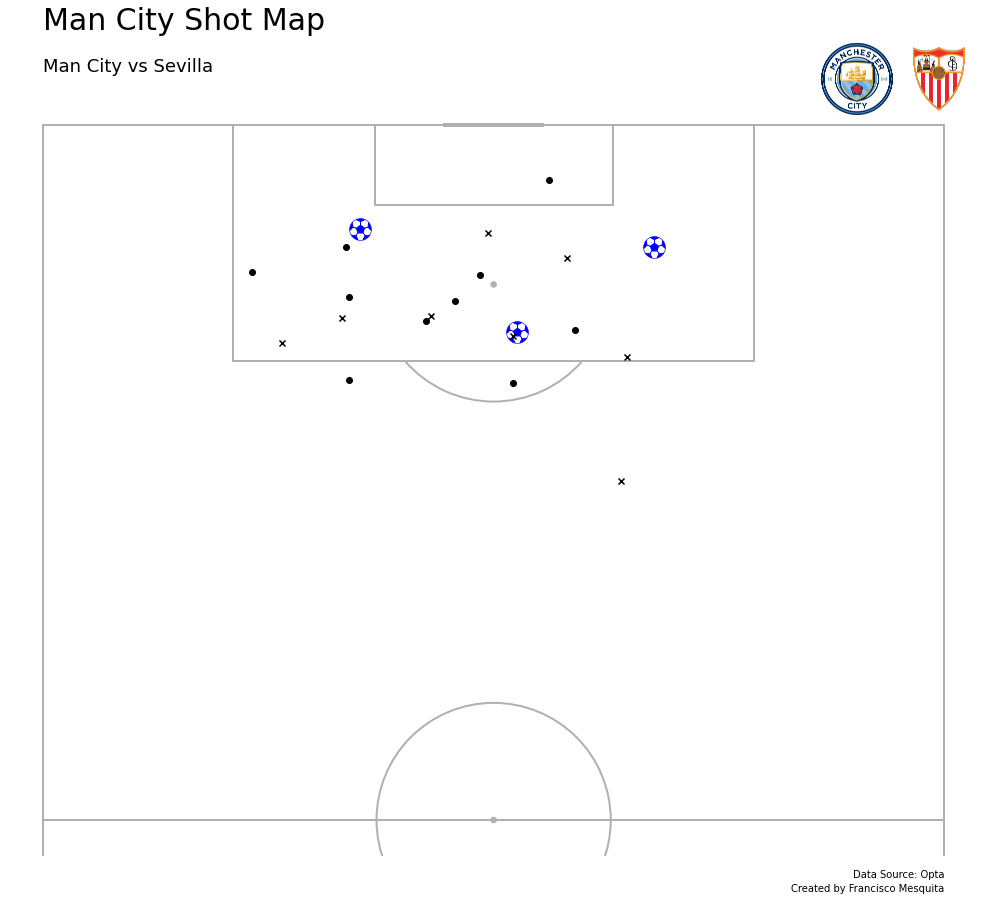

In [32]:
pitch = VerticalPitch(pitch_type='opta', half= True)
#fig, ax = pitch.grid(ncols=1, axis=False)

fig, ax = pitch.grid(figheight=13, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("white")




pitch.scatter(Goal.x, Goal.y, edgecolors='blue', linewidth = 0.6, c = 'white', 
             marker = 'football', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(100-OwnGoal.x, OwnGoal.y, edgecolors='red', linewidth = 0.6, c = 'white', 
             marker = 'football', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(MissedShots.x, MissedShots.y, c = 'black', edgecolors = 'red', #hatch = '///', 
              marker = 'x', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(SavedShot.x, SavedShot.y, c = 'black', edgecolors = 'black', #hatch = '///', 
              marker = 'o', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(ShotOnPost.x, ShotOnPost.y, c = 'black', edgecolors = 'black', #hatch = '///', 
              marker = 'o', ax = ax['pitch'], zorder =2, label='Right Foot')

#pitch.scatter(Missed.x, Missed.y, c = 'black', edgecolors = 'red', #hatch = '///', 
#              marker = 'x', ax = ax['pitch'])#,label='Right Foot')

#scatter_shotsP = pitch.scatter(shots1P.x, shots1P.y, s = (shots1P.shot_statsbomb_xg * 900) + 100, c = 'white', 
#                                edgecolors = 'blue', hatch = '///', marker = 'o', ax = ax['pitch'])

#scatter_goalsP = pitch.scatter(goalsP.x, goalsP.y, s = (goalsP.shot_statsbomb_xg * 900) + 100, edgecolors='blue', 
#                                linewidth = 0.6, c = 'white', marker = 'football', ax = ax['pitch'])

# Legend
#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
#ax.legend(handles=[barplt,normplt[0]])    

ax['title'].text(0, 0.9, 'Man City Shot Map', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

#add_image(Image.open('mancity.png'), fig, 
#          left=0.5, bottom=0.9, width=0.1, height=0.05)

# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.24), labelspacing = 1.5, fontsize = 15)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.09)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')


plt.show()

No handles with labels found to put in legend.


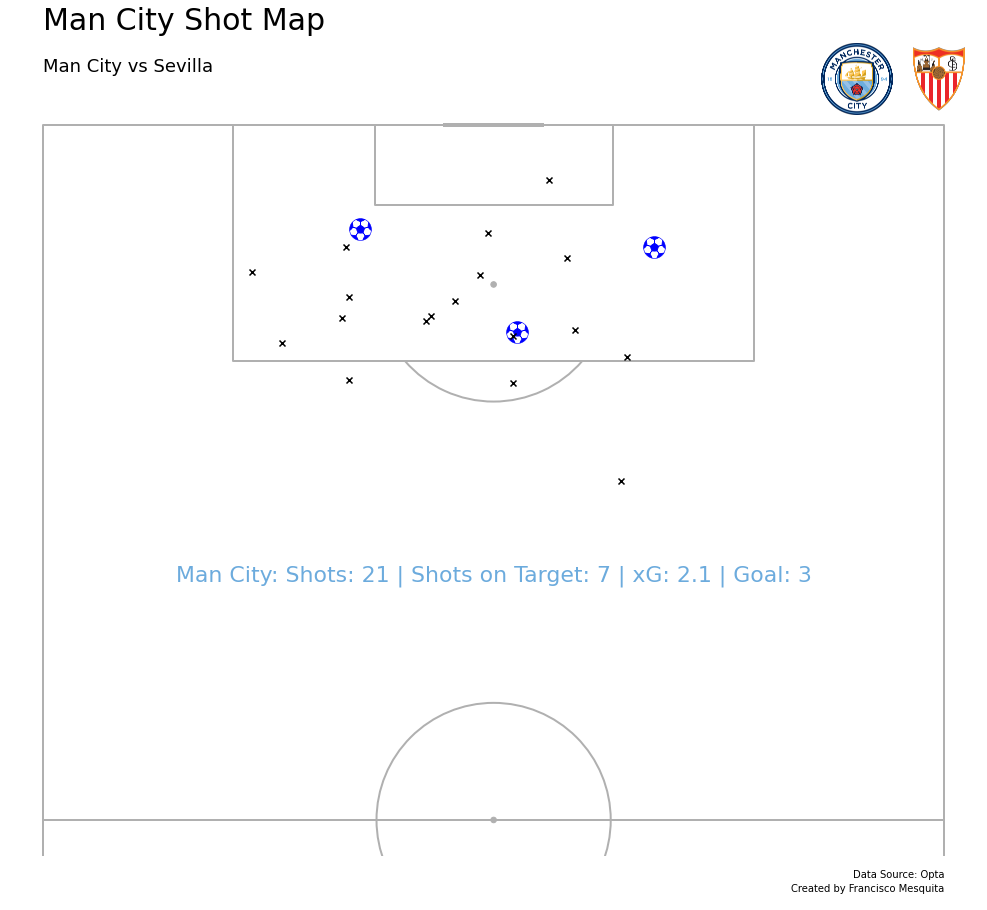

In [33]:
pitch = VerticalPitch(pitch_type='opta', half= True)
#fig, ax = pitch.grid(ncols=1, axis=False)

fig, ax = pitch.grid(figheight=13, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("white")




pitch.scatter(Goal.x, Goal.y, edgecolors='blue', linewidth = 0.6, c = 'white', 
             marker = 'football', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(100-OwnGoal.x, OwnGoal.y, edgecolors='red', linewidth = 0.6, c = 'white', 
             marker = 'football', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(MissedShots.x, MissedShots.y, c = 'black', edgecolors = 'red', #hatch = '///', 
              marker = 'x', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(SavedShot.x, SavedShot.y, c = 'black', edgecolors = 'black', #hatch = '///', 
              marker = 'x', ax = ax['pitch'], zorder =2, label='Right Foot')

pitch.scatter(ShotOnPost.x, ShotOnPost.y, c = 'black', edgecolors = 'black', #hatch = '///', 
              marker = 'x', ax = ax['pitch'], zorder =2, label='Right Foot')

#pitch.scatter(Missed.x, Missed.y, c = 'black', edgecolors = 'red', #hatch = '///', 
#              marker = 'x', ax = ax['pitch'])#,label='Right Foot')

#scatter_shotsP = pitch.scatter(shots1P.x, shots1P.y, s = (shots1P.shot_statsbomb_xg * 900) + 100, c = 'white', 
#                                edgecolors = 'blue', hatch = '///', marker = 'o', ax = ax['pitch'])

#scatter_goalsP = pitch.scatter(goalsP.x, goalsP.y, s = (goalsP.shot_statsbomb_xg * 900) + 100, edgecolors='blue', 
#                                linewidth = 0.6, c = 'white', marker = 'football', ax = ax['pitch'])

# Legend
#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
#ax.legend(handles=[barplt,normplt[0]])    

ax['title'].text(0, 0.9, 'Man City Shot Map', va='center', ha='left', fontsize=30)
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], va='center', ha='left', fontsize=18)

#add_image(Image.open('mancity.png'), fig, 
#          left=0.5, bottom=0.9, width=0.1, height=0.05)

# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.24), labelspacing = 1.5, fontsize = 15)

add_image(Image.open('mancity.png'), fig, 
          left=0.82, bottom=0.86, width=0.07, height=0.09)
add_image(Image.open('sevilla.png'), fig, 
          left=0.9, bottom=0.86, width=0.07, height=0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va='center', ha='right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va='center', ha='right')



ax['title'].text(0.5, -6.5, "Man City: Shots: 21 | Shots on Target: 7 | xG: 2.1 | Goal: 3", 
                 color = '#6CABDD', va = 'center', ha = 'center', fontsize = 22)

plt.show()